In [20]:
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [21]:
data = pd.read_csv('Admission_Predict.csv')
data.head(6)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90


In [22]:
data = shuffle(data)
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
245,246,328,110,4,4.0,2.5,9.02,1,0.81
352,353,303,100,2,3.0,3.5,8.06,1,0.64
313,314,301,100,3,3.5,3.0,8.04,0,0.67
19,20,303,102,3,3.5,3.0,8.50,0,0.62
191,192,323,110,5,4.0,5.0,8.98,1,0.87


In [23]:
print(data.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


In [24]:
#split the given dataset for Training and Testing
# data = data[['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']]
# X = data.iloc[:, :-1].values  
# y = data['Chance of Admit '].values  

In [61]:
#checking for missing values
missing_values = data.isnull().sum()
print(missing_values)

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
Admission            0
dtype: int64


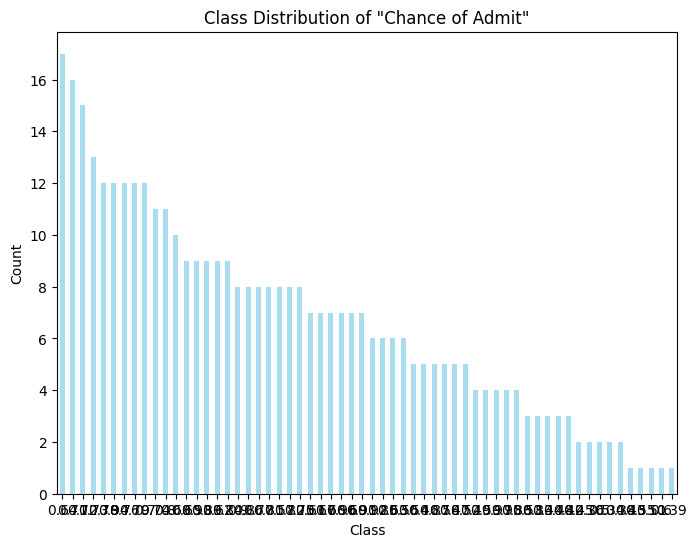

Class imbalance detected.


In [62]:
#Checking for imbalance in my target class that is "Chance of Admit"
target_variable = 'Chance of Admit '

# Calculate the class distribution
class_distribution = data[target_variable].value_counts()

# Visualize class distribution using vertical bars
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Class Distribution of "Chance of Admit"')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Check if there's a significant class imbalance
if len(class_distribution) > 1:
    minority_class_count = class_distribution.min()
    majority_class_count = class_distribution.max()
    imbalance_ratio = majority_class_count / minority_class_count

    if imbalance_ratio > 2:
        print("Class imbalance detected.")
    else:
        print("Class distribution is relatively balanced.")
else:
    print("There's only one class in the target variable.")


In [35]:
#Let's check its record in numbers
target_variable = 'Chance of Admit '

# Calculate the number of data points in each class
class_counts = data[target_variable].value_counts()

# Print the class counts
print("Class Counts:")
print(class_counts)


Class Counts:
Chance of Admit 
0.64    17
0.71    16
0.72    15
0.73    13
0.78    12
0.94    12
0.76    12
0.79    12
0.70    12
0.74    11
0.80    11
0.68    10
0.65     9
0.93     9
0.89     9
0.62     9
0.84     9
0.90     8
0.86     8
0.77     8
0.81     8
0.57     8
0.82     8
0.75     8
0.61     7
0.67     7
0.66     7
0.96     7
0.69     7
0.91     7
0.92     6
0.85     6
0.63     6
0.56     6
0.54     5
0.46     5
0.87     5
0.58     5
0.47     5
0.52     5
0.49     4
0.59     4
0.97     4
0.95     4
0.88     4
0.53     3
0.83     3
0.44     3
0.48     3
0.42     3
0.45     2
0.36     2
0.50     2
0.34     2
0.38     2
0.43     1
0.55     1
0.51     1
0.60     1
0.39     1
Name: count, dtype: int64


In [63]:
#Here my target class is imbalance but I cannot apply SMOTE as it consists of continuous values. 
# That's why I am creating a binary target variable indicating admission (1) or non-admission (0) based on 
# a threshold value.

#My threshold value is 70%, this mean if student score is equal or greater value than 70. They will be given 
# addmission and others not
threshold = 0.7  

# Created a binary target variable indicating admission (1) or non-admission (0)
data['Admission'] = data['Chance of Admit '].apply(lambda x: 1 if x >= threshold else 0)

print(data[['Chance of Admit ', 'Admission']].head(-1))


     Chance of Admit   Admission
245              0.81          1
352              0.64          0
313              0.67          0
19               0.62          0
191              0.87          1
..                ...        ...
15               0.54          0
278              0.66          0
389              0.76          1
48               0.82          1
248              0.80          1

[399 rows x 2 columns]


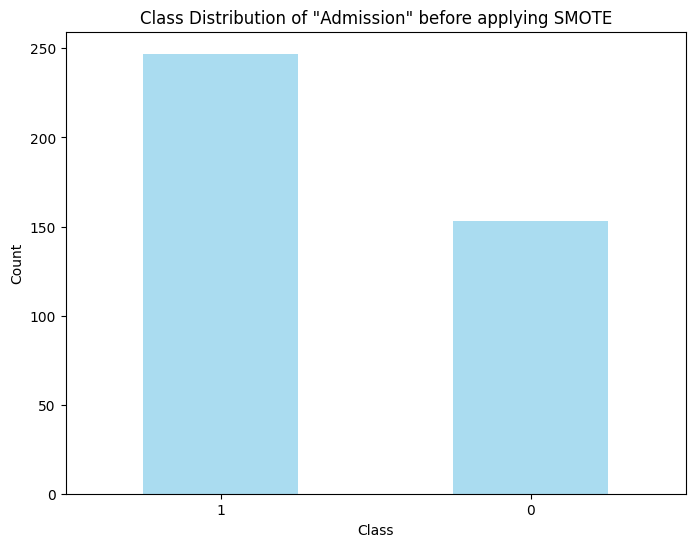

Class distribution is relatively balanced.


In [64]:
#Again checking for imbalance for my new target class that is "Admission"
target_variable = 'Admission'

# Calculate the class distribution
class_distribution = data[target_variable].value_counts()

# Visualize class distribution using vertical bars
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Class Distribution of "Admission" before applying SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Check if there's a significant class imbalance
if len(class_distribution) > 1:
    minority_class_count = class_distribution.min()
    majority_class_count = class_distribution.max()
    imbalance_ratio = majority_class_count / minority_class_count

    if imbalance_ratio > 2:
        print("Class imbalance detected.")
    else:
        print("Class distribution is relatively balanced.")
else:
    print("There's only one class in the target variable.")


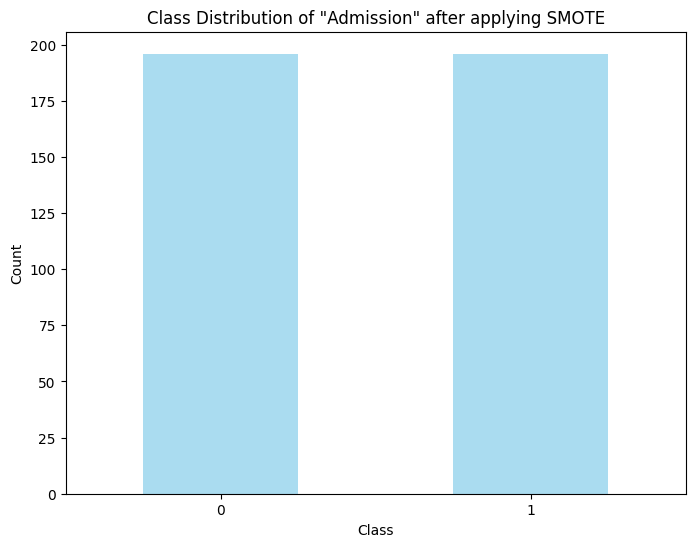

In [66]:
#Now I can apply SMOTE on my new target class i.e: Admission
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


# Assuming your target variable is named 'Chance of Admit'
target_variable = 'Admission'

# Split the data into features (X) and the target variable (y)
X = data.drop(columns=[target_variable])  # Features
y = data[target_variable]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a SMOTE instance to oversample the minority class
smote = SMOTE(random_state=42)

# Fit SMOTE on the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



# Check the class distribution after SMOTE
class_distribution = y_train_resampled.value_counts()
# Visualize class distribution using vertical bars
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Class Distribution of "Admission" after applying SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()



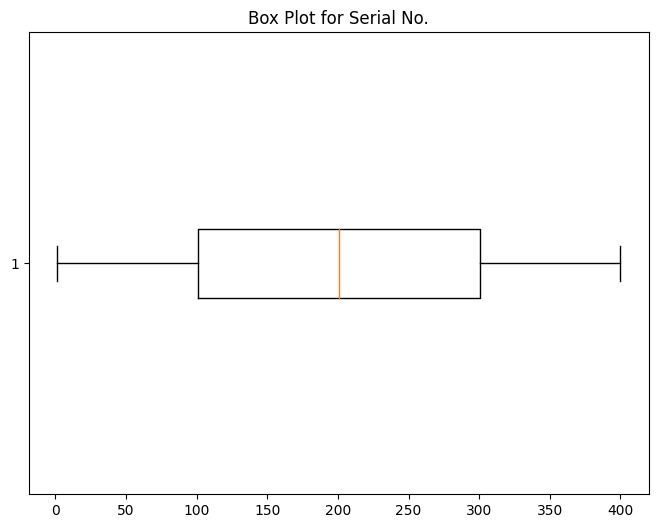

count    400.000000
mean     200.500000
std      115.614301
min        1.000000
25%      100.750000
50%      200.500000
75%      300.250000
max      400.000000
Name: Serial No., dtype: float64
Potential outliers in Serial No.:
Empty DataFrame
Columns: [Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit , Admission]
Index: []


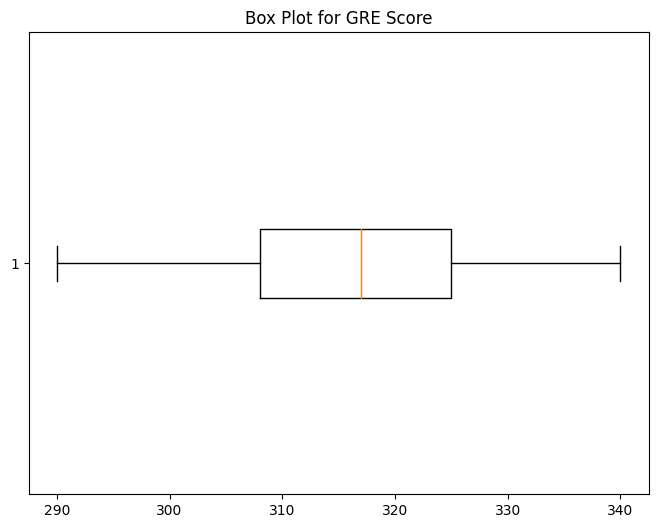

count    400.000000
mean     316.807500
std       11.473646
min      290.000000
25%      308.000000
50%      317.000000
75%      325.000000
max      340.000000
Name: GRE Score, dtype: float64
Potential outliers in GRE Score:
Empty DataFrame
Columns: [Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit , Admission]
Index: []


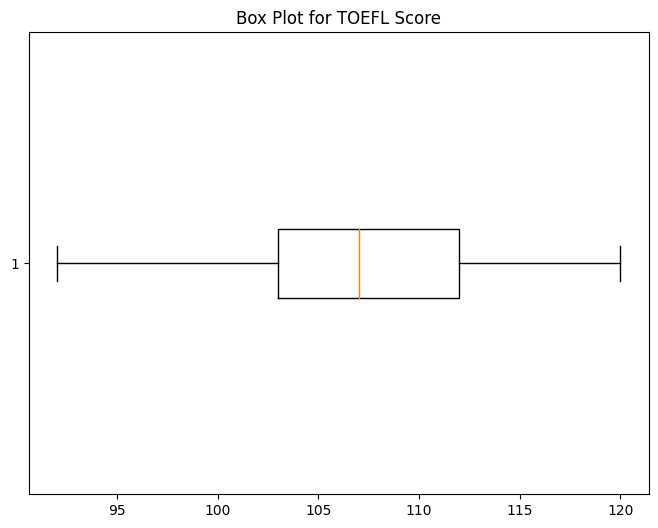

count    400.000000
mean     107.410000
std        6.069514
min       92.000000
25%      103.000000
50%      107.000000
75%      112.000000
max      120.000000
Name: TOEFL Score, dtype: float64
Potential outliers in TOEFL Score:
Empty DataFrame
Columns: [Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit , Admission]
Index: []


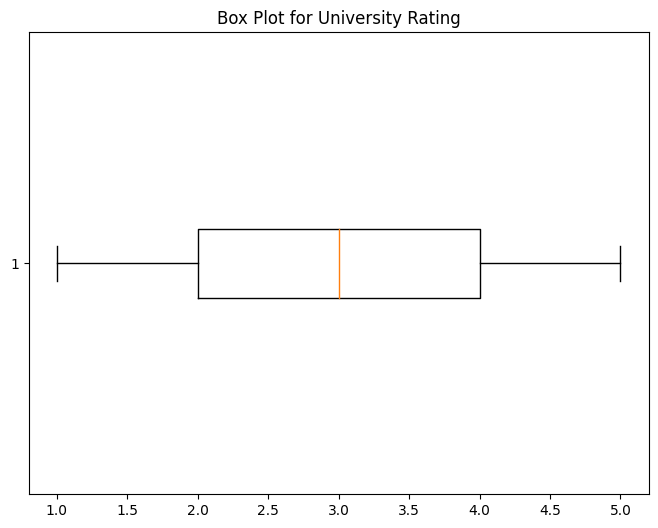

count    400.000000
mean       3.087500
std        1.143728
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: University Rating, dtype: float64
Potential outliers in University Rating:
Empty DataFrame
Columns: [Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit , Admission]
Index: []


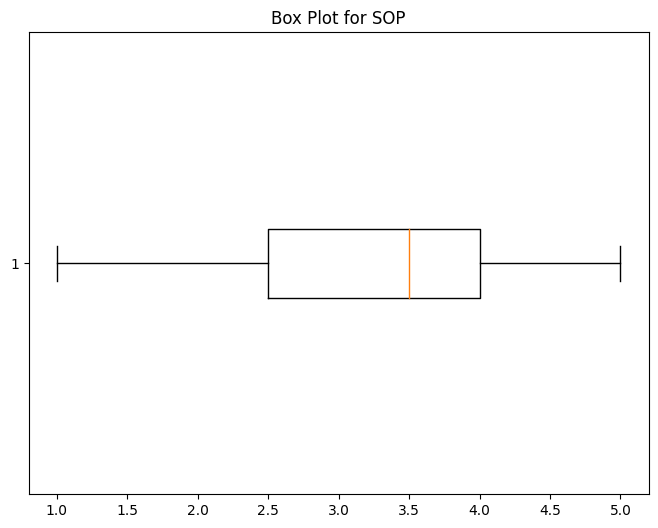

count    400.000000
mean       3.400000
std        1.006869
min        1.000000
25%        2.500000
50%        3.500000
75%        4.000000
max        5.000000
Name: SOP, dtype: float64
Potential outliers in SOP:
Empty DataFrame
Columns: [Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit , Admission]
Index: []


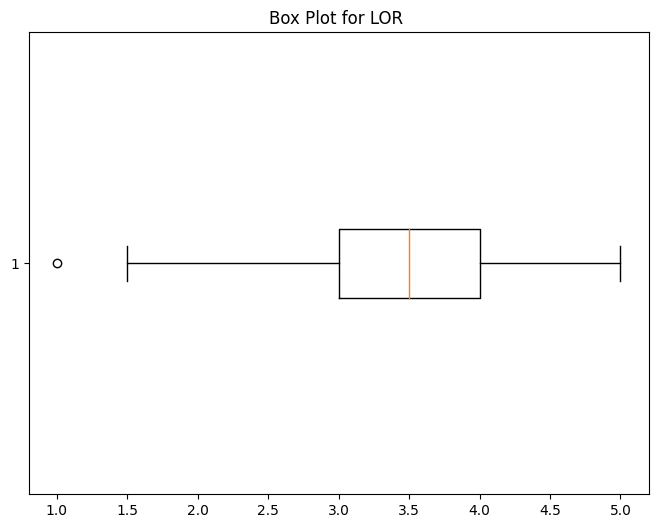

count    400.000000
mean       3.452500
std        0.898478
min        1.000000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: LOR , dtype: float64
Potential outliers in LOR :
     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
347         348        299           94                  1  1.0   1.0  7.34   

     Research  Chance of Admit   Admission  
347         0              0.42          0  


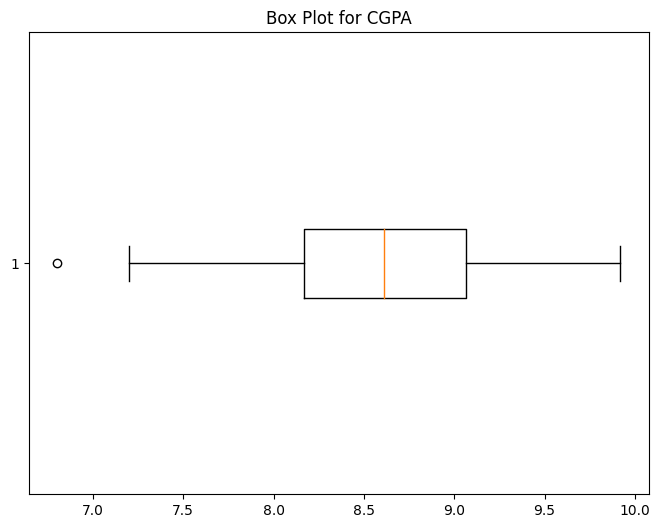

count    400.000000
mean       8.598925
std        0.596317
min        6.800000
25%        8.170000
50%        8.610000
75%        9.062500
max        9.920000
Name: CGPA, dtype: float64
Potential outliers in CGPA:
    Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
58          59        300           99                  1  3.0   2.0   6.8   

    Research  Chance of Admit   Admission  
58         1              0.36          0  


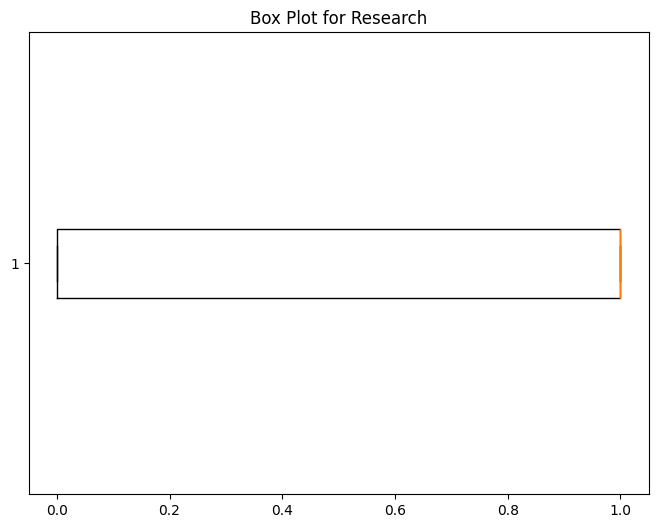

count    400.000000
mean       0.547500
std        0.498362
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Research, dtype: float64
Potential outliers in Research:
Empty DataFrame
Columns: [Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit , Admission]
Index: []


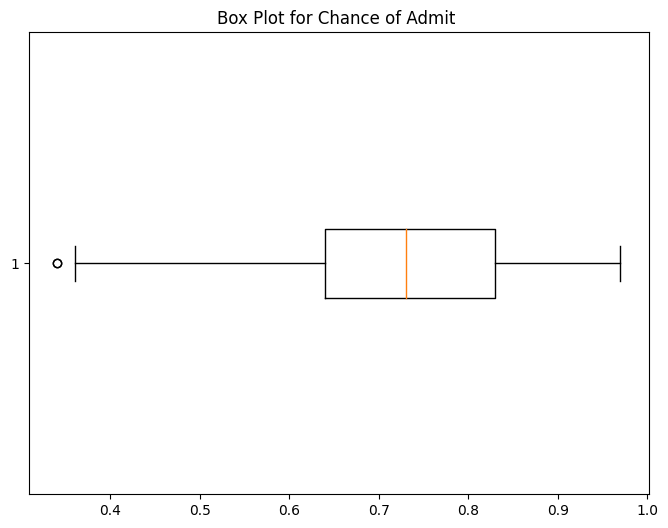

count    400.000000
mean       0.724350
std        0.142609
min        0.340000
25%        0.640000
50%        0.730000
75%        0.830000
max        0.970000
Name: Chance of Admit , dtype: float64
Potential outliers in Chance of Admit :
     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
92           93        298           98                  2  4.0   3.0  8.03   
376         377        297           96                  2  2.5   2.0  7.43   

     Research  Chance of Admit   Admission  
92          0              0.34          0  
376         0              0.34          0  


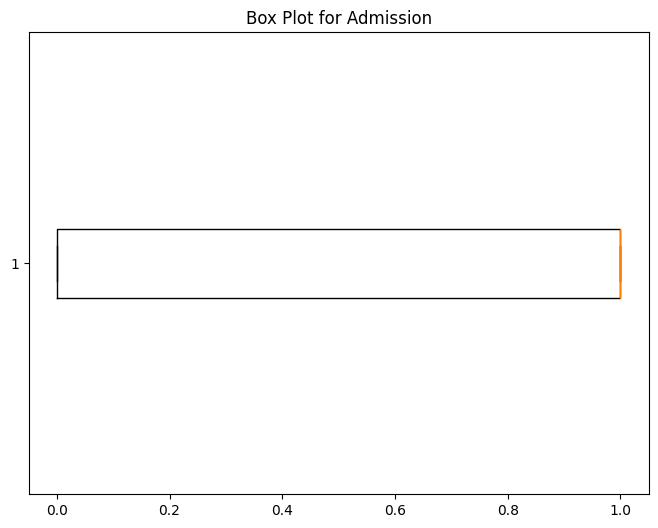

count    400.000000
mean       0.617500
std        0.486606
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Admission, dtype: float64
Potential outliers in Admission:
Empty DataFrame
Columns: [Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit , Admission]
Index: []


In [48]:
# Checking outliers in all columns
for column_name in data.select_dtypes(include=['number']).columns:
    
    #To visualize potential outliers
    plt.figure(figsize=(8, 6))
    plt.boxplot(data[column_name], vert=False)
    plt.title(f'Box Plot for {column_name}')
    plt.show()

    
    summary_stats = data[column_name].describe()
    print(summary_stats)

    # Function to detect potential outliers using the IQR method
    def detect_outliers_iqr(data):
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return (data < lower_bound) | (data > upper_bound)

    # Detect and print potential outliers using the IQR method
    outliers = detect_outliers_iqr(data[column_name])
    potential_outliers = data[outliers]
    print(f"Potential outliers in {column_name}:")
    print(potential_outliers)


In [68]:
# I will not remove outliers from LOR, CGPA and Chance of Admit. As these are student scores and every score
#  data is meaningfull.
#That's why I will choose those classification models, that are less affected by outliers. Those are below:
target_variable = 'Admission'  
features = data.drop(columns=[target_variable])  

X_train, X_test, y_train, y_test = train_test_split(features, data[target_variable], test_size=0.2, random_state=42)


In [69]:
#Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#Created a Random Forest classifier with 100 trees
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model on the training data
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test, y_pred)
print(report)


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        51

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [70]:
#SVM (Support Vector Machine)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


# Created an SVM classifier 
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the SVM model on the training data
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.65
              precision    recall  f1-score   support

           0       1.00      0.03      0.07        29
           1       0.65      1.00      0.78        51

    accuracy                           0.65        80
   macro avg       0.82      0.52      0.43        80
weighted avg       0.77      0.65      0.52        80



In [72]:
#It is giving us accuracy of 65%, so to make it better, I am doing hyperparameter tuning
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


# Define a range of hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'] + [0.1, 1, 10]
}

# Create an SVM classifier
svm_classifier = SVC(random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_train, y_train)

# Get the best SVM model with optimized hyperparameters
best_svm_classifier = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test, y_pred)
print(report)

print("Best Hyperparameters:")
print(grid_search.best_params_)


KeyboardInterrupt: 